# From Ordinary Differential equations to Neural Networks, solving mechanics problems in a new way

# Harmonic Oscillations

Harmonic oscillations are a fundamental concept in physics and engineering that describe the repetitive motion of a system around an equilibrium position. A harmonic oscillator can be found in many physical systems, such as pendulums, springs, and electrical circuits. These systems can be modeled mathematically as a simple harmonic motion, which is characterized by a sinusoidal displacement with a constant amplitude and frequency. The understanding of harmonic oscillations is essential for various fields, including mechanics, electromagnetism, and quantum mechanics. In this context, the study of harmonic oscillations provides insights into the behavior of physical systems and their response to external stimuli, allowing us to design and optimize devices and structures for various applications.

## Harmonic Oscillator: Spring-Block System

$$
\nonumber
F=-\frac{dV(x)}{dx}=-k(x-b).
$$

Our equation of motion is, with the only force given by the one-dimensional spring force and assuming $b=0$, 

$$
ma = m\frac{d^2x}{dt^2}=-kx.
$$

Defining the natural frequency $\omega_0 = \sqrt{k/m}$, we can rewrite this equation as

$$
\frac{d^2x}{dt^2}=-\omega_0^2x.
$$

We call this a natural frequency since it is defined by the constants that describe our system, the spring constant $k$ and the mass $m$ of the object.

The dimensionality of $\omega_0$ is $[T]^{-1}$.

We can as usual split this equation of motion into one equation for the derivative of the velocity and

$$
\frac{dv}{dt}=-\omega_0^2x,
$$

and

$$
\frac{dx}{dt}=v.
$$

The solution to the equations of motion is given by

$$
x(t) = A\cos{(\omega_0 t)}+B\sin{(\omega_0 t)},
$$

where $A$ and $B$ are in general complex constants to be determined by the initial conditions.

Inserting the solution into the equation of motion, we have:

$$
\frac{d^2x}{dt^2}=-\omega_0^2x,
$$

we have

$$
\frac{d^2x}{dt^2} = -A\omega_0^2\cos{(\omega_0 t)}-B\omega_0^2\sin{(\omega_0 t)},
$$

and the right-hand side is just $-\omega_0^2 x(t)$. Thus, inserting the solution into the differential equation shows that we obtain the same original differential equation.



Let us assume that our initial time $t_0=0$s and that the initial position $x(t_0)=x_0$ and that $v_0=0$ (we skip units here).
This gives us

$$
x(t=0) = x_0 =A,
$$

and it leaves $B$ undetermined. Taking the derivative of $x$, we obtain the velocity:

$$
v(t) = -A\omega_0\sin{(\omega_0 t)}+B\omega_0\cos{(\omega_0 t)},
$$

and with

$$
v(t=0) = 0=B,
$$

we see that our solution with these initial conditions becomes

$$
x(t) = x_0\cos{(\omega_0 t)}.
$$

## Energy Conservation

Our energy is given by the kinetic energy and the harmonic oscillator potential energy, that is we have (for a one-dimensional harmonic oscillator potential)

$$
E=\frac{1}{2}mv^2+\frac{1}{2}kx^2.
$$

We assume that we have initial conditions $v_0=0$ (no kinetic energy) and $x(t=0)=x_0$.
With these initial conditions we have

$$
x(t) = x_0\cos{(\omega_0 t)},
$$

and the velocity is given by

$$
v(t) = -x_0\omega_0\sin{(\omega_0 t)},
$$

At a time $t\ne 0$, we have:

$$
E(t)=\frac{1}{2}mv^2+\frac{1}{2}kx^2=\frac{1}{2}mx_0^2\omega_0^2\sin^2{(\omega_0 t)}+\frac{1}{2}kx_0^2\cos^2{(\omega_0 t)},
$$

Recalling that $\omega_0^2=k/m$, we get:

$$
E(t)=\frac{1}{2}kx_0^2\sin^2{(\omega_0 t)}+\frac{1}{2}kx_0^2\cos^2{(\omega_0 t)}=\frac{1}{2}kx_0^2=E_0.
$$

For $x_0 = A$,

$$E_0 = \frac{1}{2}kx_0^2 = \frac{1}{2}kA^2$$

Energy is thus conserved.

## Scaling with $\tau = \omega_0t$

$$
\frac{d^2x}{dt^2}=-\omega_0^2x => \omega_0^2\frac{d^2x}{d\tau^2}=-\omega_0^2x,
$$

Dividing by $\omega_0^2$ on both sides, we get:

$$a = \frac{d^2x}{d\tau^2}= \frac{dv}{d\tau} = -x$$

Now, the dimensionality of both $\frac{dv}{d\tau} = -x$ and $\frac{dx}{d\tau} = v$ is $[L]$ 

The solution to this is given by:

$$x(\tau) = x_0\cos{(\tau)}, v(\tau) = -x_0\sin{(\tau)}$$

## Numerical Solution

### Euler-Cromer

In [2]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

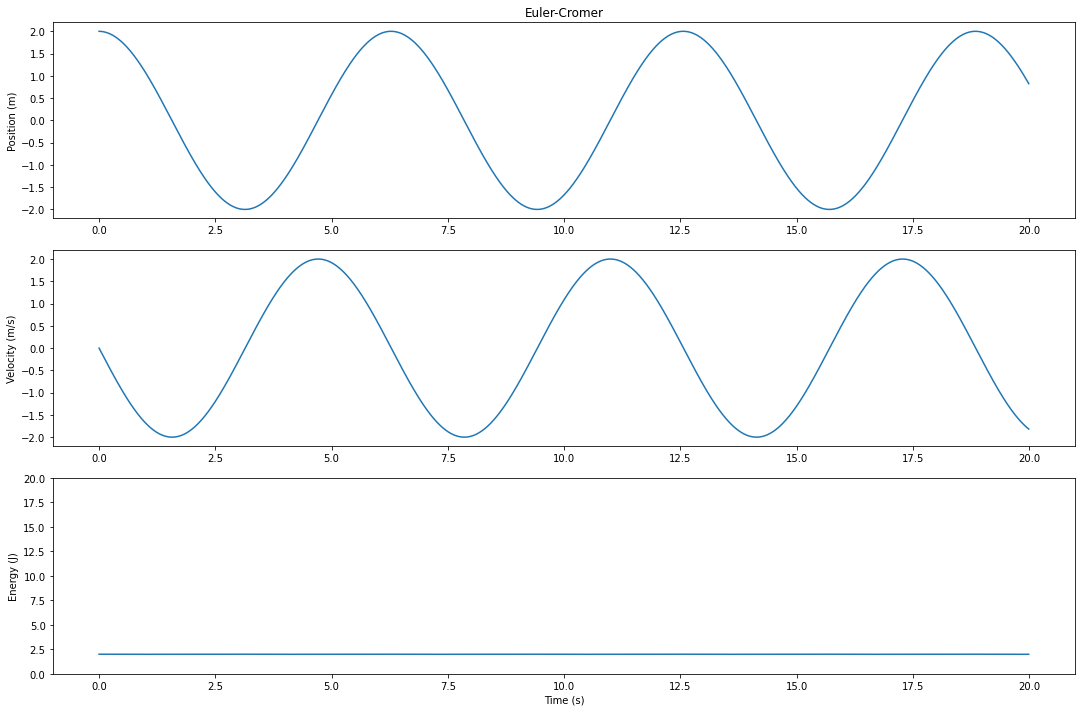

In [35]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 0
x[0] = x0
v[0] = v0
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
K = 1/2*m*v**2
V = 1/2*k*x**2
E = K+V
# Plot position, velocity and total energy as function of time    
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,10)
ax[0].set_title('Euler-Cromer')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[2].plot(t,E)
ax[2].set_ylim([0,20])
ax[2].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[2].set_ylabel('Energy (J)')
fig.tight_layout()
plt.show()

### Velocity-Verlet

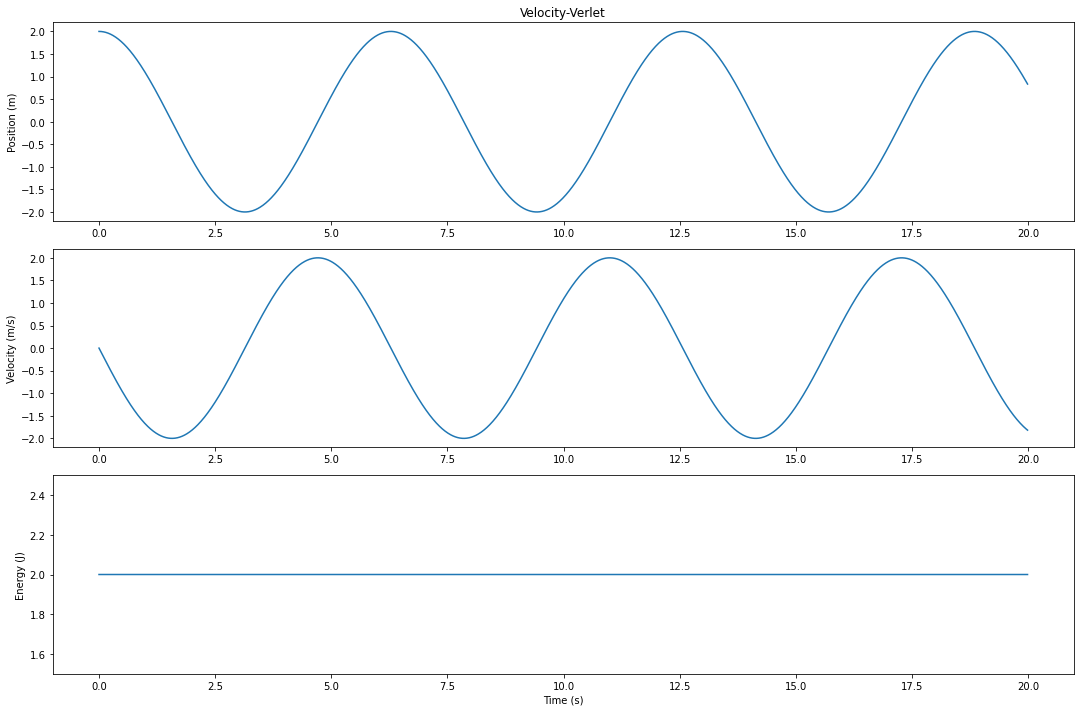

In [36]:
DeltaT = 0.01
#set up arrays 
tfinal = 20
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 0
x[0] = x0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    a =  -x[i]
    # update velocity, time and position using the Velocity-Verlet method
    x[i+1] = x[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -x[i+1]
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
K = 1/2*m*v**2
V = 1/2*k*x**2
E = K+V
# Plot position, velocity and total energy as function of time    
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,10)
ax[0].set_title('Velocity-Verlet')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[2].plot(t,E)
ax[2].set_ylim([1.5,2.5])
ax[2].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[2].set_ylabel('Energy (J)')
fig.tight_layout()
plt.show()

## Sliding Block (With Damping Due To Friction)

Now, we change the differential equation we want to solve by adding to our program a first derivative of position (the velocity) which is meant to mimick the role of friction.

$$
m\frac{d^2x(t)}{dt^2} + \beta\frac{dx}{dt}+kx = ma(t)+\beta v(t) +kx(t) = 0.
$$

We divide by $m$ and introduce $\omega_0^2=\sqrt{k/m}$ and obtain

$$
\frac{d^2x}{dt^2} + \frac{\beta}{m}\frac{dx}{dt}+\omega_0^2x(t) =0.
$$

Thereafter, we introduce a dimensionless time $\tau = t\omega_0$ and rewrite our equation as:

$$
\frac{d^2x}{d\tau^2} + \frac{\beta}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =0,
$$

which gives us

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =0.
$$

We then define $\gamma = b/(2m\omega_0)$ and rewrite our equation as:

$$
\frac{d^2x}{d\tau^2} + 2\gamma\frac{dx}{d\tau}+x(\tau) =0.
$$

This gives us:

$$\frac{d^2x}{d\tau^2} = - 2\gamma v(t)-x(\tau) \text{ where } v(t) = \frac{dx}{d\tau}$$

Again, the dimensionality of both $\frac{dv}{d\tau} = -2\gamma v(t)-x(\tau)$ and $\frac{dx}{d\tau} = v(t)$ is $[L]$ 

## Numerical Solutions of Damped Oscillations

With $k=1, m=1$, it means $\omega_0 = 1$. Thus, $\gamma$ can be chosen accordingly for the three cases: underdamping, critical damping and overdamping.

### (i) Underdamping

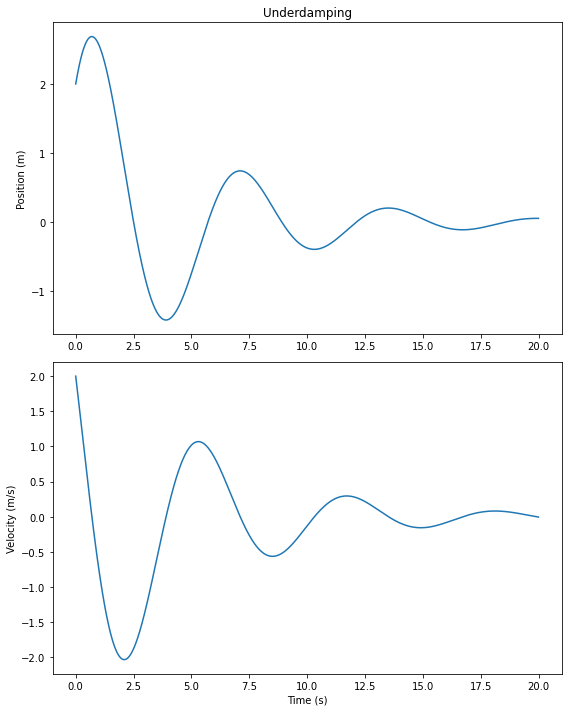

In [49]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Underdamping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### (ii) Critical Damping

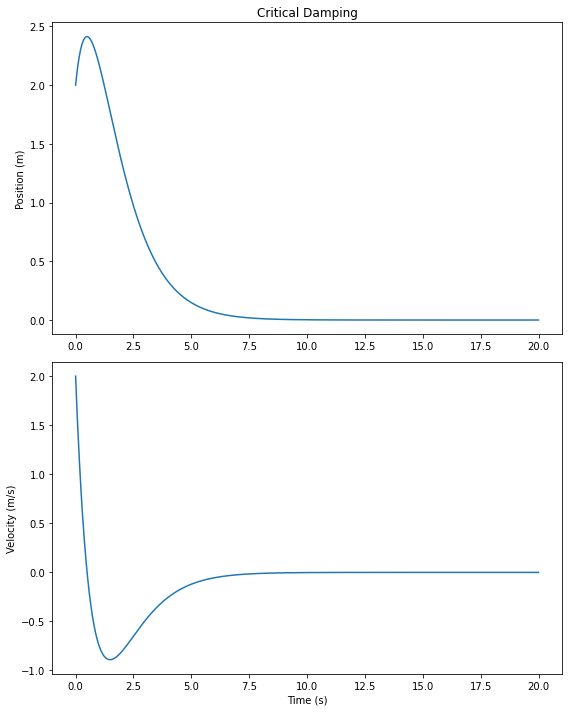

In [50]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 1
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Critical Damping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### (iii) Overdamping

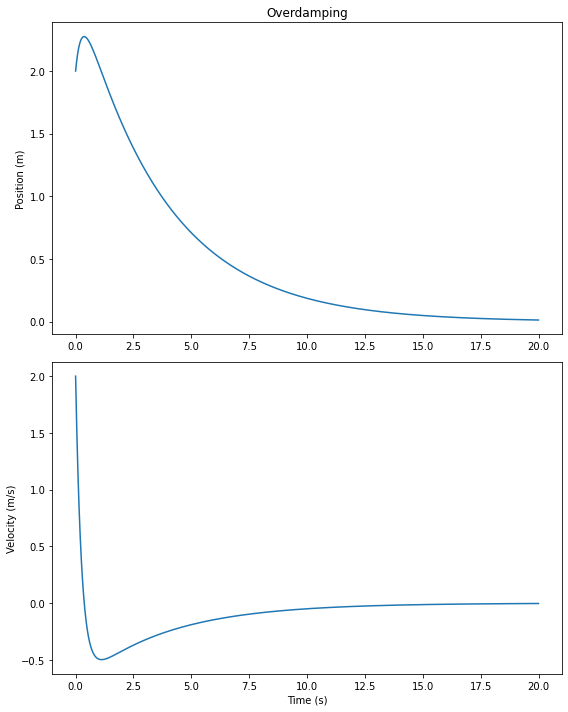

In [55]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 2
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Overdamping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

## Driven Oscillations

Assume that our external driving force is given by

$$
F_{\mathrm{ext}}(t) = F_0\cos{(\omega t)},
$$

Introducing the external force into the differential equation and dividing by $m$ and introducing $\omega_0^2=\sqrt{k/m}$ we have

$$
\frac{d^2x}{dt^2} + \frac{b}{m}\frac{dx}{dt}+\omega_0^2x(t) =\frac{F_0}{m}\cos{(\omega t)},
$$

Thereafter we introduce a dimensionless time $\tau = t\omega_0$
and a dimensionless frequency $\tilde{\omega}=\omega/\omega_0$. We have then

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =\frac{F_0}{m\omega_0^2}\cos{(\tilde{\omega}\tau)},
$$

Introducing a new amplitude $\tilde{F} =F_0/(m\omega_0^2)$ (check dimensionality again) we have

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =\tilde{F}\cos{(\tilde{\omega}\tau)}.
$$

Our final step, as we did in the case of various types of damping, is
to define $\gamma = b/(2m\omega_0)$ and rewrite our equations as

$$
\frac{d^2x}{d\tau^2} + 2\gamma\frac{dx}{d\tau}+x(\tau) =\tilde{F}\cos{(\tilde{\omega}\tau)}.
$$

This gives us:

$$\frac{d^2x}{d\tau^2} = - 2\gamma v(t)-x(\tau)+\tilde{F}\cos{(\tilde{\omega}\tau)} \text{ where } v(t) = \frac{dx}{d\tau}$$

## Numerical Solutions of Driven Oscillations

### Euler-Cromer

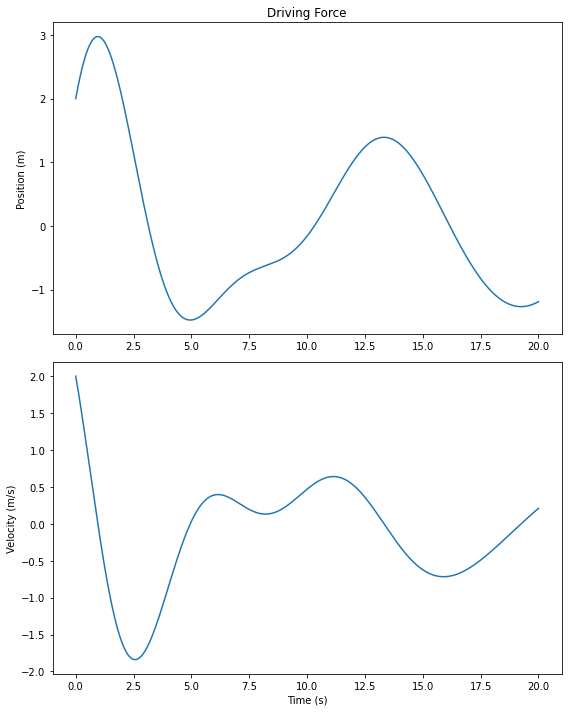

In [59]:
DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as one-dimensional arrays of time
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using Euler-Cromer's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]+Ftilde*cos(t[i]*Omegatilde)
    # update velocity, time and position
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Driving Force')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### Runge-Kutta (Fourth Order)

In [110]:
def SpringForce(v,x,t):
#   note here that we have divided by mass and we return the acceleration
    return  -2*gamma*v-x+Ftilde*cos(t*Omegatilde)

In [111]:
def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT

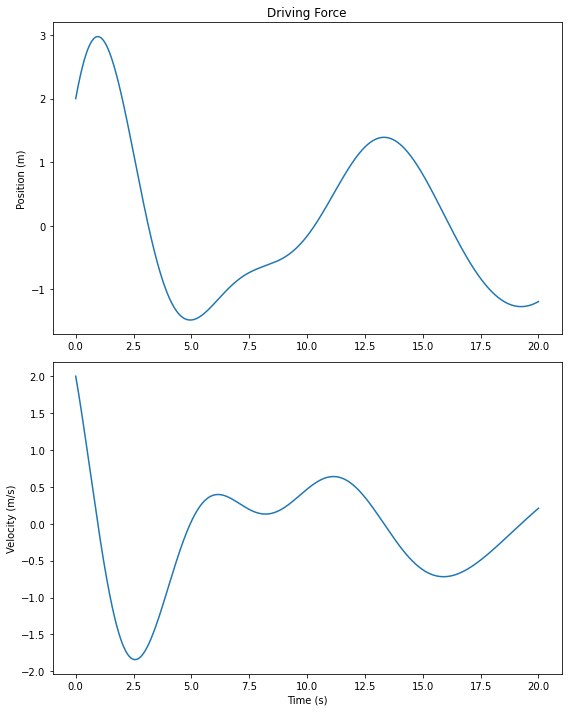

In [112]:
DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions (can change to more than one dim)
x0 = 2 
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using the RK4 method
# Note that we define the force function as a SpringForce
RK4(v,x,t,n,SpringForce)

# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Driving Force')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

## Neural Networks

In [165]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [166]:
learning_rate = 0.001
epochs = 10000
hidden_layer_size = 64
l2_regularization = 1e-4
dropout_rate = 0.2

In [167]:
model = Sequential([
    LSTM(hidden_layer_size, activation='tanh', input_shape=(1, 3), kernel_regularizer=l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(2)
])

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

In [168]:
def SpringForce(t, y, gamma, Ftilde, Omegatilde):
    x, v = y
    a = -2*gamma*v-x+Ftilde*cos(t*Omegatilde)
    return [v, a]

In [177]:
gamma = 0.2
Ftilde = 1.0
Omegatilde = 0.5

t_span = (0, 20)
t_eval = np.linspace(*t_span, num=1000)
initial_conditions = [2, 2]

solution = solve_ivp(SpringForce, t_span, initial_conditions, args=(gamma, Ftilde, Omegatilde), t_eval=t_eval, method='RK45')
t_train = solution.t
y_train = solution.y.T

In [178]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(t_train))

t_train, t_val = t_train[:split_index], t_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [179]:
input_train = np.column_stack((t_train, y_train))
input_train = input_train[:, np.newaxis, :]

input_val = np.column_stack((t_val, y_val))
input_val = input_val[:, np.newaxis, :]

In [180]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model.fit(input_train, y_train, epochs=epochs, verbose=1, validation_data=(input_val, y_val), callbacks=[early_stopping])

Epoch 1/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.0334 - val_loss: 0.0766
Epoch 2/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.0347 - val_loss: 0.0696
Epoch 3/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.0597
Epoch 4/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.0858
Epoch 5/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.0344 - val_loss: 0.0558
Epoch 6/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0843
Epoch 7/10000
25/25 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0632
Epoch 8/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0756
Epoch 9/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.0862
Epoch 10/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.0344 - val_lo

7/7 [==============================] - 0s 1ms/step


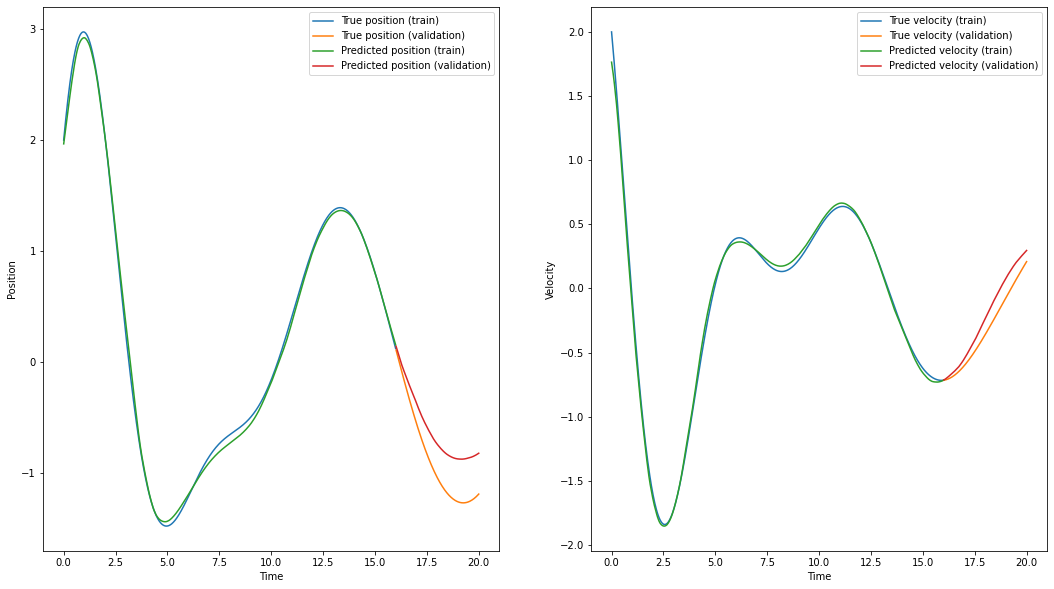

In [181]:
y_pred_train = model.predict(input_train)
y_pred_val = model.predict(input_val)

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(t_train, y_train[:, 0], label='True position (train)')
plt.plot(t_val, y_val[:, 0], label='True position (validation)')
plt.plot(t_train, y_pred_train[:, 0], label='Predicted position (train)')
plt.plot(t_val, y_pred_val[:, 0], label='Predicted position (validation)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_train, y_train[:, 1], label='True velocity (train)')
plt.plot(t_val, y_val[:, 1], label='True velocity (validation)')
plt.plot(t_train, y_pred_train[:, 1], label='Predicted velocity (train)')
plt.plot(t_val, y_pred_val[:, 1], label='Predicted velocity (validation)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.show()

### Test Model on Other Initial Conditions

In [196]:
gamma = 1
Ftilde = 0
Omegatilde = 1

t_span = (0, 20)
t_eval = np.linspace(*t_span, num=1000)
initial_conditions = [2, 2]

solution = solve_ivp(SpringForce, t_span, initial_conditions, args=(gamma, Ftilde, Omegatilde), t_eval=t_eval, method='RK45')
t_train = solution.t
y_train = solution.y.T

In [197]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(t_train))

t_train, t_val = t_train[:split_index], t_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [198]:
input_train = np.column_stack((t_train, y_train))
input_train = input_train[:, np.newaxis, :]

input_val = np.column_stack((t_val, y_val))
input_val = input_val[:, np.newaxis, :]

7/7 [==============================] - 0s 2ms/step


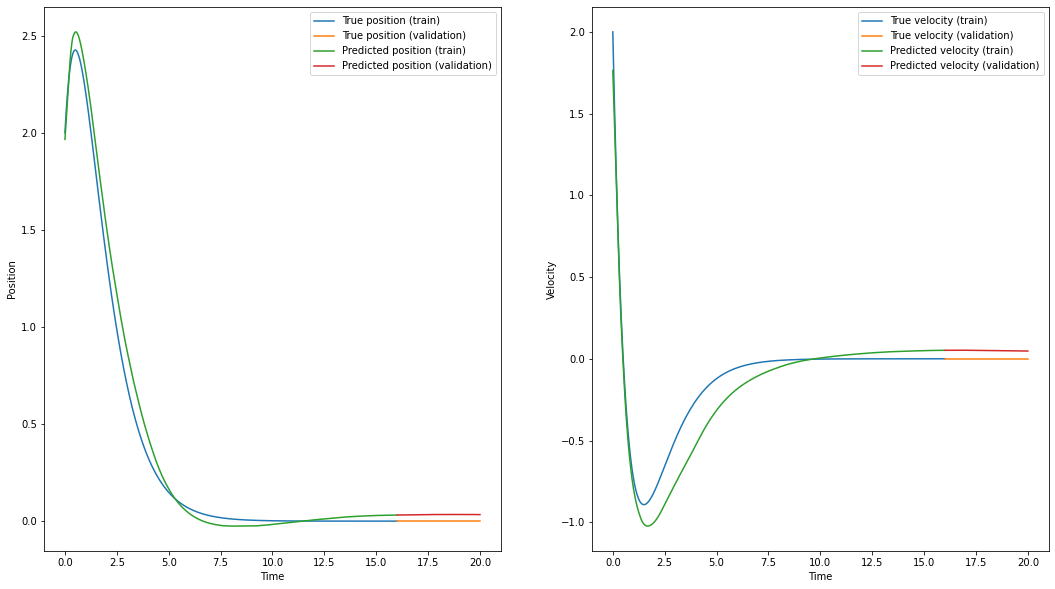

In [199]:
y_pred_train = model.predict(input_train)
y_pred_val = model.predict(input_val)

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(t_train, y_train[:, 0], label='True position (train)')
plt.plot(t_val, y_val[:, 0], label='True position (validation)')
plt.plot(t_train, y_pred_train[:, 0], label='Predicted position (train)')
plt.plot(t_val, y_pred_val[:, 0], label='Predicted position (validation)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_train, y_train[:, 1], label='True velocity (train)')
plt.plot(t_val, y_val[:, 1], label='True velocity (validation)')
plt.plot(t_train, y_pred_train[:, 1], label='Predicted velocity (train)')
plt.plot(t_val, y_pred_val[:, 1], label='Predicted velocity (validation)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.show()